In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
df=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')
df.head()
print(df.shape)
test_data.shape


(30000, 24)


(20000, 23)

# New section

In [ ]:
new_df=df.dropna()
new_df.shape

(15050, 24)

Total columns containing null values=15000

In [ ]:
test_data.isnull().sum()

Customer ID                       0
Name                              0
Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64

In [ ]:
#print(df.head(), df.Gender.describe(), df.Profession.describe(),df.shape, df.describe())

In [ ]:
# print(df["Profession"].astype('category').dtypes)
#print(pd.unique(df["Profession"]))
# df["Profession"] = df["Profession"].astype('category')
# df["Profession"] = df["Profession"].cat.codes
# print(pd.unique(df["Profession"]))

New_Gender=test_data['Gender'].replace(['F','M'],[1,0])
New_Income_Stability=test_data['Income Stability'].replace(['Low','High'],[0,1])
New_Location=test_data['Location'].replace(['Rural','Semi-Urban','Urban'],[1,2,3])
New_Expense_Type_1=test_data['Expense Type 1'].replace(['N','Y'],[0,1])
New_Expense_Type_2=test_data['Expense Type 2'].replace(['N','Y'],[0,1])
New_Property_Location=test_data['Property Location'].replace(['Rural','Semi-Urban','Urban'],[1,2,3])
New_Profession = test_data['Profession'].replace(['Working', 'Pensioner', 'State servant', 'Commercial associate',\
'Unemployed','Student', 'Businessman', 'Maternity leave'],[1.0,2.0,3,4,5,6,7,8])

list_of_tuple = list(zip(New_Gender,New_Income_Stability,New_Location,New_Expense_Type_1,New_Expense_Type_2,New_Property_Location,New_Profession))
new_d_test = pd.DataFrame(list_of_tuple,columns=['Gender', 'Income_Stability','Location','Expense_Type_1','Expense_Type_2','Property_Location','Profession'])  
new_d_test['Customer ID']=test_data['Customer ID']
new_d_test['Age']=test_data['Age']
new_d_test['Income (USD)']=test_data['Income (USD)']
new_d_test['Loan Amount Request (USD)']=test_data['Loan Amount Request (USD)']
new_d_test['Current Loan Expenses (USD)']=test_data['Current Loan Expenses (USD)']
new_d_test['Dependents']=test_data['Dependents']
new_d_test['Credit Score']=test_data['Credit Score']
new_d_test['No. of Defaults']=test_data['No. of Defaults']
new_d_test['Co-Applicant']=test_data['Co-Applicant']
new_d_test['Property Price']=test_data['Property Price']
new_d_test['Property Type']=test_data['Property Type']

new_d_test.head()
print(new_d_test.shape)
print(new_d_test.isnull().sum())


new_d_test['Co-Applicant']=new_d_test['Co-Applicant'].replace(['?'],[0])
new_d_test['Property Price']=new_d_test['Property Price'].replace(['?'],[0])
new_d_test['Property Price'].describe()
print(new_d_test.describe(include='all'))


(20000, 18)
Gender                           31
Income_Stability                813
Location                          0
Expense_Type_1                    0
Expense_Type_2                    0
Property_Location               160
Profession                        0
Customer ID                       0
Age                               0
Income (USD)                    750
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Co-Applicant                      0
Property Price                    0
Property Type                     0
dtype: int64
              Gender  Income_Stability      Location  Expense_Type_1  \
count   19969.000000      19187.000000  20000.000000    20000.000000   
unique           NaN               NaN           NaN             NaN   
top              NaN               NaN           NaN             NaN   
freq             NaN               NaN 

After Excluding following columns 
1.Name
2.Type of employment
3.Property ID
4.Has active credit card



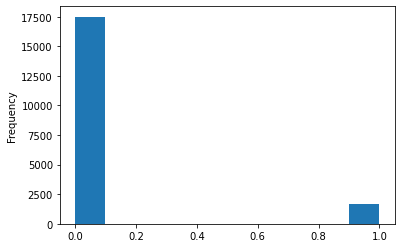

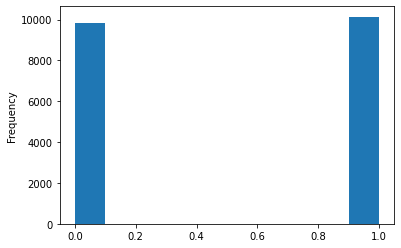

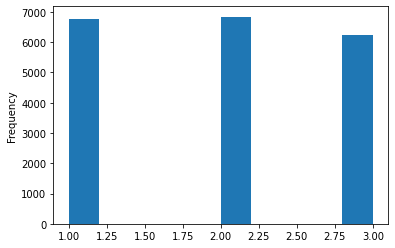

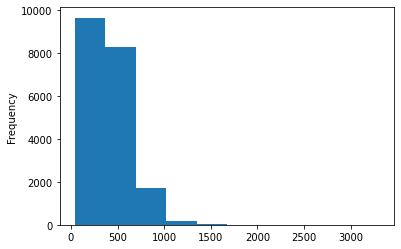

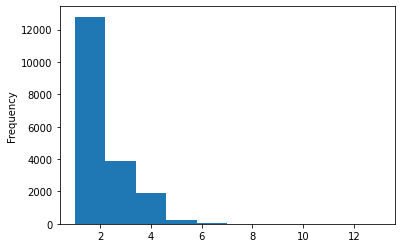

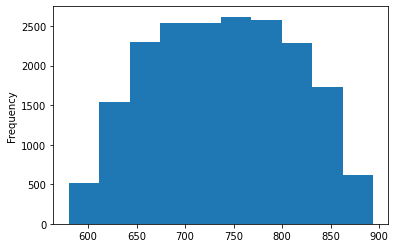

In [ ]:
#Plotting columns containing null values
import matplotlib.pyplot as plt

new_d_test['Income_Stability'].plot(kind='hist')
plt.show()
new_d_test['Gender'].plot(kind='hist')
plt.show()
new_d_test['Property_Location'].plot(kind='hist')
plt.show()
new_d_test['Current Loan Expenses (USD)'].plot(kind='hist')
plt.show()
new_d_test['Dependents'].plot(kind='hist')
plt.show()
new_d_test['Credit Score'].plot(kind='hist')
plt.show()



In [ ]:
#Replacing all null values with median

new_d_test['Gender'].fillna(value=1,inplace=True)
new_d_test['Income (USD)'].fillna(value=2536.995394,inplace=True)
new_d_test['Income_Stability'].fillna(value=0,inplace=True)
new_d_test['Property_Location'].fillna(value=2,inplace=True)
new_d_test['Current Loan Expenses (USD)'].fillna(value=374,inplace=True)
new_d_test['Dependents'].fillna(value=2,inplace=True)
new_d_test['Credit Score'].fillna(value=739.300000,inplace=True)
print(new_d_test.isnull().sum())

Gender                         0
Income_Stability               0
Location                       0
Expense_Type_1                 0
Expense_Type_2                 0
Property_Location              0
Profession                     0
Customer ID                    0
Age                            0
Income (USD)                   0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Co-Applicant                   0
Property Price                 0
Property Type                  0
dtype: int64


In [ ]:
Gender=df['Gender'].replace(['F','M'],[1,0])
Income_Stability=df['Income Stability'].replace(['Low','High'],[0,1])
Location=df['Location'].replace(['Rural','Semi-Urban','Urban'],[1,2,3])
Expense_Type_1=df['Expense Type 1'].replace(['N','Y'],[0,1])
Expense_Type_2=df['Expense Type 2'].replace(['N','Y'],[0,1])
Property_Location=df['Property Location'].replace(['Rural','Semi-Urban','Urban'],[1,2,3])
Profession = df['Profession'].replace(['Working', 'Pensioner', 'State servant', 'Commercial associate',\
'Unemployed','Student', 'Businessman', 'Maternity leave'],[1.0,2.0,3,4,5,6,7,8])

list_of_tuples = list(zip(Gender,Income_Stability,Location,Expense_Type_1,Expense_Type_2,Property_Location,Profession))
d = pd.DataFrame(list_of_tuples,columns=['Gender', 'Income_Stability','Location','Expense_Type_1','Expense_Type_2','Property_Location','Profession'])  
d['Customer ID']=df['Customer ID']
d['Age']=df['Age']
d['Income (USD)']=df['Income (USD)']
d['Loan Amount Request (USD)']=df['Loan Amount Request (USD)']
d['Current Loan Expenses (USD)']=df['Current Loan Expenses (USD)']
d['Dependents']=df['Dependents']
d['Credit Score']=df['Credit Score']
d['No. of Defaults']=df['No. of Defaults']
d['Co-Applicant']=df['Co-Applicant']
d['Property Price']=df['Property Price']
d['Property Type']=df['Property Type']
d['Loan Sanction Amount (USD)']=df['Loan Sanction Amount (USD)']
d.head()
d.shape


(30000, 19)

In [ ]:
new_d=d.dropna()
print(new_d.shape)



(21030, 19)


In [ ]:
from sklearn.model_selection import train_test_split as tts
import numpy as np

In [ ]:
X_train,X_test,y_train,y_test = tts(new_d.drop(['Loan Sanction Amount (USD)'],axis=1),new_d['Loan Sanction Amount (USD)'],test_size = 0.2,random_state = 1)
print(X_train.shape, type(X_train))
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(16824, 18) <class 'pandas.core.frame.DataFrame'>
(4206, 18)
(16824,)
(4206,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor()
X_train = X_train.drop(['Customer ID'], axis=1)
gbr.fit(X_train,y_train)
X_test_old = X_test
X_test = X_test.drop(['Customer ID'], axis=1)


In [ ]:
ans_df = pd.DataFrame(columns=['Customer ID','Loan Sanction Amount (USD)'])
new_d_test_1=new_d_test.drop(['Customer ID'], axis=1)


In [ ]:
ans_df['Customer ID'] = new_d_test['Customer ID']


In [ ]:
ans_df['Loan Sanction Amount (USD)'] = gbr.predict(new_d_test_1)

In [ ]:
print(ans_df.shape)
ans_df.head
ans_df.to_csv('solution_rfr.csv',index=False)


(20000, 2)
